# Cross Validation e Post-Model workflow
(Validação cruzada e fluxo de trabalho pos-modelo)


O cross-validation ajuda a validar a performance do modelo de maneira robusta, enquanto o post-model workflow garante que o modelo esteja pronto para produção e continua funcionando bem ao longo do tempo.


Ao fazer isso, as vantagens são:

- melhor uso dos dados disponíveis
- avaliação mais confiável e menos sujeita a variações devido à divisão dos dados

Para trabalhar com estes conceitos, será preciso:

- carregar as duas colunas do conjunto de dados iris
- separar os dados em conjunto de treinamento e teste
- utilizar o algoritmo KNN, com 3 e 5 vizinhos.
- pontuar ambos algoritmos
- selecionar os melhor modelo

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,2:]
y = iris.target

Separar os dados em conjunto de teste e treinamento. Usar o estratificação (dividir em partes iguais),  e o `random_state = 7`

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_treino, X_teste, y_treino,y_teste = train_test_split(X,y, stratify=y, random_state=7)

## Como fazer

1. primeiro instancie o algoritmo com dois vizinhos próximos

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
kn_3 = KNeighborsClassifier(n_neighbors=3)
kn_5 = KNeighborsClassifier(n_neighbors=5)

2. Pontue ambos algoritmos usando `cross_val_score`

In [8]:
from sklearn.model_selection import cross_val_score

In [10]:
kn_3_scores = cross_val_score(kn_3, X_treino,y_treino, cv=4)
kn_5_scores = cross_val_score(kn_5, X_treino,y_treino, cv=4)
kn_3_scores

array([0.96428571, 0.92857143, 0.89285714, 1.        ])

In [11]:
kn_5_scores

array([0.96428571, 0.96428571, 0.89285714, 1.        ])

3. ver a estatística básica, média

In [12]:
print(f"Média: kn3 {kn_3_scores.mean()}")
print(f"Média: kn5 {kn_5_scores.mean()}")

Média: kn3 0.9464285714285714
Média: kn5 0.9553571428571429


4. ver os desvio padrão

In [14]:
print(f"Desvio padrão: kn3 {kn_3_scores.std()}")
print(f"Desvio padrão: kn5 {kn_5_scores.std()}")

Desvio padrão: kn3 0.039929785312496226
Desvio padrão: kn5 0.03891874056732743


Dessa forma, ao olhar para o `kn5` tem um melhor desempenho, sendo o modelo selecionado.

## K-fold validação cruzada

Para selecionar os melhores modelos, mas da para ver os índices dos desdobramento e ver os dados em quais colunas se encontram. 
Porque a validação cruzada funciona, da seguinte forma, `cv=4` significa que há 4 desdobramentos, ouseja, (4 matrizes quadradas) os dados são dividos em 4 colunas, sendo que cada coluna tem 4 linhas, o conjuntos de teste estão na diagonal principal, o restante é conjunto para treinamento.

1. criar um conjunto de dados pequeno

In [15]:
import numpy as np

In [16]:
X = np.array([[1,2],[3,4],[5,6],[7,8],[1,2],[3,4],[5,6],[7,8]])
y = np.array([1,2,1,2,1,2,1,2])

2. importar `KFold` e selecionar o número de separação

In [19]:
from sklearn.model_selection import KFold

In [20]:
kf = KFold(n_splits=4)

3. iterar através do gerador e printar os indices

In [21]:
cc = 1
for train_index , teste_index in kf.split(X):
    print(f"Rodada: {cc}: Índice de treino: {train_index}  índice de teste: {teste_index}")
    cc += 1

Rodada: 1: Índice de treino: [2 3 4 5 6 7]  índice de teste: [0 1]
Rodada: 2: Índice de treino: [0 1 4 5 6 7]  índice de teste: [2 3]
Rodada: 3: Índice de treino: [0 1 2 3 6 7]  índice de teste: [4 5]
Rodada: 4: Índice de treino: [0 1 2 3 4 5]  índice de teste: [6 7]


In [24]:
#obter o número de separações
kf.get_n_splits()

4

## Tem mais

Se é possível ver os dados nos desdobramentos, então da para gerar uma lista

In [25]:
lista_indices = list(kf.split(X))

In [26]:
lista_indices

[(array([2, 3, 4, 5, 6, 7]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7]), array([2, 3])),
 (array([0, 1, 2, 3, 6, 7]), array([4, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7]))]

In [27]:
train_indices, test_indices = lista_indices[3]

In [28]:
X[train_indices]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

In [29]:
y[train_indices]

array([1, 2, 1, 2, 1, 2])

In [30]:
# ver os dados para teste
X[test_indices]

array([[5, 6],
       [7, 8]])

In [31]:
y[test_indices]

array([1, 2])

## Validação cruzada balanceada

É muito importante usar o `stratify` na validação cruzada, os subconjuntos do conjunto de dados são versões pequenas do conjunto total.

1. criar um conjunto de dados

In [32]:
import numpy as np

In [33]:
X = np.array([[1,2],[3,4],[5,6],[7,8],[1,2],[3,4],[5,6],[7,8]])
y = np.array([1,1,1,1,2,2,2,2])

1. se configurar para 4 desdobramentos no conjunto de dados, cada um dos desdobramento terá um só valor para ser o alvo, e para isso é necessário usar o `StratifiedKFold`

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
skf = StratifiedKFold(n_splits=4)

2. ver os indices de cada desdobramento

In [36]:
cc = 1
for train_in, test_in in skf.split(X,y):
    print(f"Rodada:{cc} : indices de treinamento: {train_in}, indices de teste: {test_in}")
    cc += 1

Rodada:1 : indices de treinamento: [1 2 3 5 6 7], indices de teste: [0 4]
Rodada:2 : indices de treinamento: [0 2 3 4 6 7], indices de teste: [1 5]
Rodada:3 : indices de treinamento: [0 1 3 4 5 7], indices de teste: [2 6]
Rodada:4 : indices de treinamento: [0 1 2 4 5 6], indices de teste: [3 7]


Também é possível usar `StratifiedShuffleSplit` para reordenar a estratificação do desdobramento. 

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25)

In [39]:
cc = 1
for train_index, test_index in sss.split(X,y):
    print(f"Rodada: {cc}, indices de treinamento :{train_index}, indices de teste: {test_index}")
    cc += 1

Rodada: 1, indices de treinamento :[0 4 1 7 5 2], indices de teste: [6 3]
Rodada: 2, indices de treinamento :[1 0 5 4 7 3], indices de teste: [2 6]
Rodada: 3, indices de treinamento :[0 5 3 7 6 2], indices de teste: [1 4]
Rodada: 4, indices de treinamento :[5 4 2 7 3 0], indices de teste: [6 1]
Rodada: 5, indices de treinamento :[1 5 4 0 7 3], indices de teste: [2 6]


## Validação cruzada com ShuffleSplit

`ShuffleSplit` é um das técnicas de validação cruzada. Esta técnica pega uma exemplo simples de dados para um número específico de iterações.


1. criar um conjunto de dados. Metados dos dados seram o 'exemplo simples de dados'  para estimar a média e ver que tão perto está da média. Gerar uma distribuição  de um exemplo para conjunto de dados, com uma média de 1000 e um desvio padrão de 10

In [40]:
%matplotlib inline

import numpy as np
media_verdadeira = 1000
desvio_verdadeiro = 10
N =  1000
dataset = np.random.normal(loc=media_verdadeira, scale=desvio_verdadeiro, size=N)

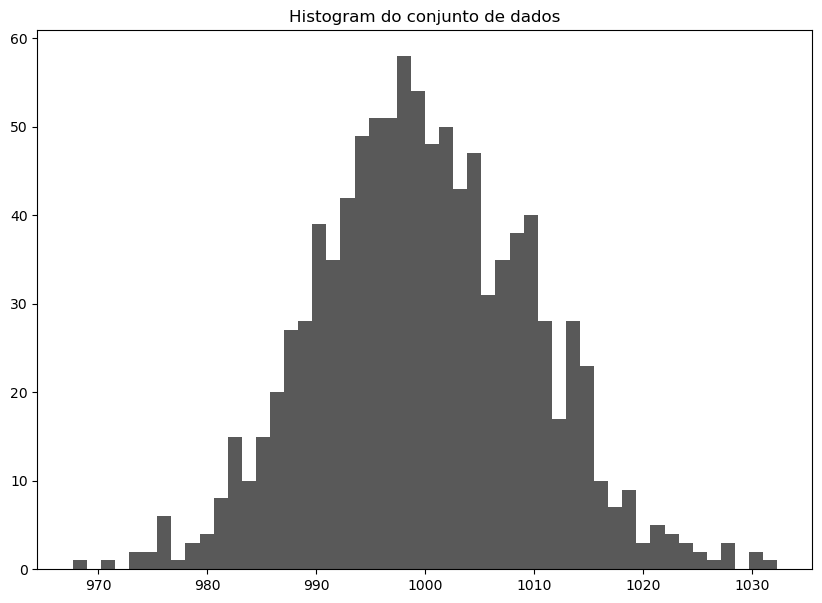

In [41]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10,7))
ax.hist(dataset, color="k", alpha=.65, histtype="stepfilled", bins=50)
ax.set_title("Histogram do conjunto de dados")
plt.show()

2. estimar a média da metade do conjunto de dados

In [52]:
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set[:np.int64(N/2)].mean()
estimate

1000.1034629472394

3. também pode calcular  a média do conjunto de dados completo

In [54]:
data_mean = dataset.mean()
data_mean

999.9055146213298

Para observar o comportamento do `ShuffleSplit` crie um gráfico

In [55]:
from sklearn.model_selection import ShuffleSplit
shufle_split = ShuffleSplit(n_splits=100, test_size=.5, random_state=0)

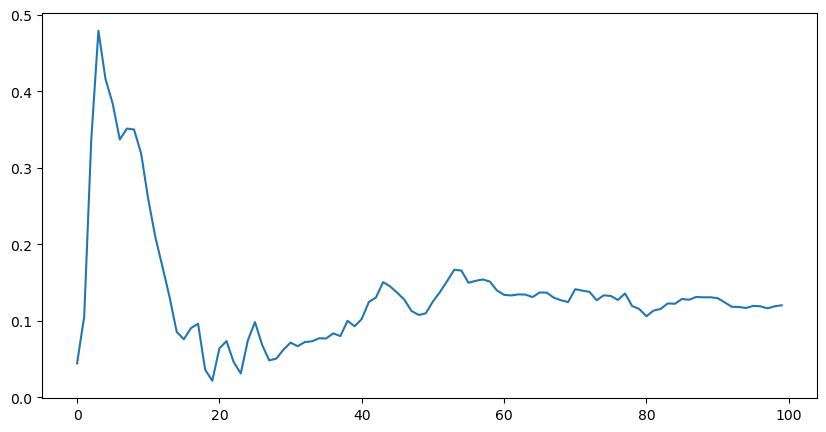

In [57]:
mean_p = []
estima_distancia = []
for train_index, not_used_index in shufle_split.split(fitting_set):
    mean_p.append(fitting_set[train_index].mean())
    shuf_estimate = np.mean(mean_p)
    estima_distancia.append(np.abs(shuf_estimate - dataset.mean()))
plt.figure(figsize = (10,5))
plt.plot(estima_distancia)
plt.show()